# Examining the Breast Cancer dataset from UCI

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Read in csv file of cancer dataset
cancer = pd.read_csv('/mnt/c/Users/DeWayne Halfen/Documents/Data Science/DataSets/breast-cancer-wisconsin.csv')
# Label features 
cancer.columns = ['id', 'clump_tickness' , 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class']

In [43]:
# Examine data structure
cancer.head()

,id,clump_tickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1018099,1,1,1,1,2,10,3,1,1,2


In [44]:
# Examine data structure
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
id                          698 non-null int64
clump_tickness              698 non-null int64
uniformity_of_cell_size     698 non-null int64
uniformity_of_cell_shape    698 non-null int64
marginal_adhesion           698 non-null int64
single_cell_size            698 non-null int64
bare_nuclei                 698 non-null object
bland_chromatin             698 non-null int64
normal_nucleoli             698 non-null int64
mitosis                     698 non-null int64
class                       698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [45]:
# Convert '?' to NaN
cancer[cancer == '?'] = np.nan

# Print the number of NaNs
print(cancer.isnull().sum())

id                           0
clump_tickness               0
uniformity_of_cell_size      0
uniformity_of_cell_shape     0
marginal_adhesion            0
single_cell_size             0
bare_nuclei                 16
bland_chromatin              0
normal_nucleoli              0
mitosis                      0
class                        0
dtype: int64


In [46]:
# Remove rows with NaNs
cancer['bare_nuclei'] = pd.to_numeric(cancer['bare_nuclei'], errors='coerce')
cancer2 = cancer.dropna()
cancer2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
id                          682 non-null int64
clump_tickness              682 non-null int64
uniformity_of_cell_size     682 non-null int64
uniformity_of_cell_shape    682 non-null int64
marginal_adhesion           682 non-null int64
single_cell_size            682 non-null int64
bare_nuclei                 682 non-null float64
bland_chromatin             682 non-null int64
normal_nucleoli             682 non-null int64
mitosis                     682 non-null int64
class                       682 non-null int64
dtypes: float64(1), int64(10)
memory usage: 63.9 KB


In [47]:
# Convert bare_nuclei back to int64
#cancer2['bare_nuclei'] = cancer2['bare_nuclei'].astype('int64')
cancer2.bare_nuclei = cancer2.bare_nuclei.astype('int64')

/home/halfendt/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


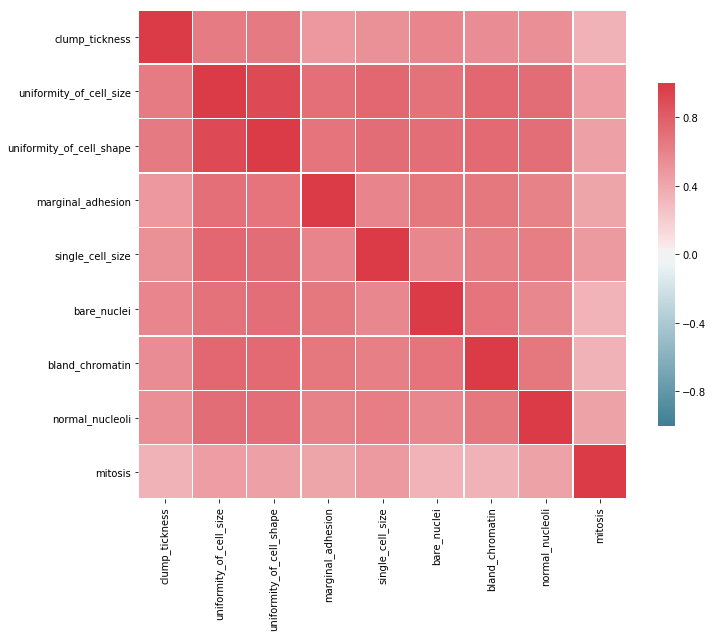

In [48]:
# Compute the correlation matrix
corr = cancer2.iloc[:, 1:-1].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax = 1.0, vmin = -1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})
plt.show()

In [50]:
features = cancer2.iloc[:, 1:-1]
features.values

array([[ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       [ 6,  8,  8, ...,  3,  7,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [51]:
feature_list = list(features)
feature_list

['clump_tickness',
 'uniformity_of_cell_size',
 'uniformity_of_cell_shape',
 'marginal_adhesion',
 'single_cell_size',
 'bare_nuclei',
 'bland_chromatin',
 'normal_nucleoli',
 'mitosis']

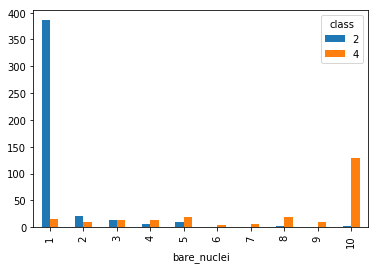

In [60]:
pd.crosstab(cancer2['bare_nuclei'], cancer2['class']).plot(kind='bar')
plt.show()

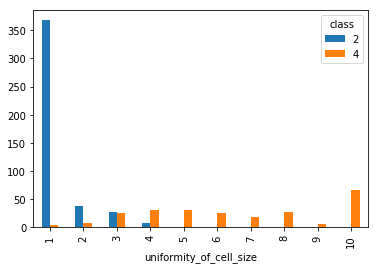

In [53]:
pd.crosstab(cancer2['uniformity_of_cell_size'], cancer2['class']).plot(kind='bar')
plt.show()

In [73]:
# Convert class to binary "2" is benign to "0", "4" is malignant to "1"
cancer2['class'] = cancer2['class'].map({2: 0, 4: 1})

/home/halfendt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
#Split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer2.iloc[:, 1:-1].values, cancer2['class'].values, test_size=0.3, random_state=42)

In [81]:
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))

Number of observations in the training data: 477
Number of observations in the test data: 205


In [82]:
# Perform Random Forest model on data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [83]:
# Examine results from RFC
# Calculate confusion matrix on test data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix)

[[138   2]
 [  6  59]]


In [84]:
# Calculate Classification Report on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       140
          1       0.97      0.91      0.94        65

avg / total       0.96      0.96      0.96       205



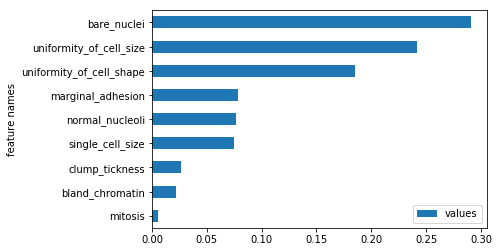

In [85]:
# Plot most important features in RFC model
feature_importances = pd.DataFrame({'feature names': feature_list, 
                                    'values': rfc.feature_importances_})
feature_importances.sort_values(by='values', ascending=True, inplace=True)
feature_importances.index = feature_importances['feature names']
feature_importances.plot.barh()
plt.show()

In [86]:
# Perform Decision Tree mode on training data
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

In [87]:
# Define class names for Decision Tree flow chart
names = ['benign','malignant']
names

['benign', 'malignant']

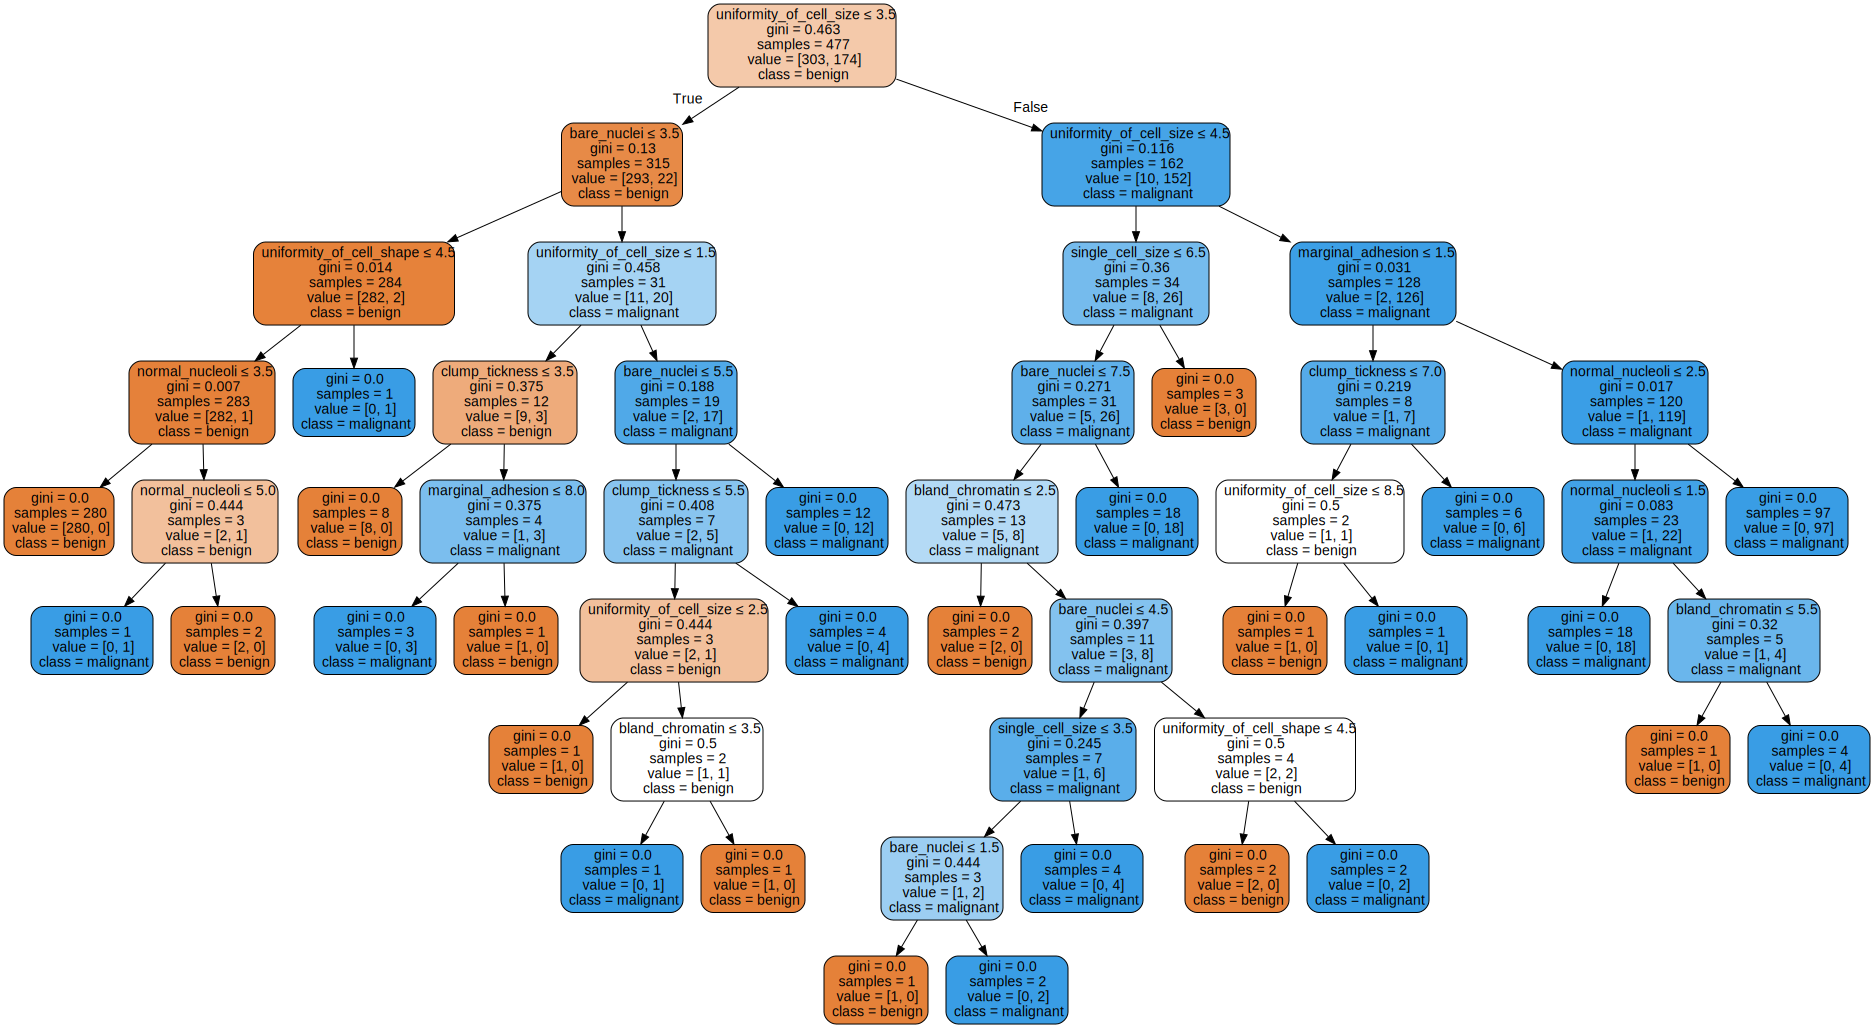

In [88]:
# Plot Decision Tree flow chart
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_list,  
                     class_names=names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [89]:
# Examine results from Decision Tree model
# Calculate confusion matrix on test data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_clf)
print(confusion_matrix)

[[137   3]
 [  6  59]]


In [90]:
# Calculate Classification Report on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_clf))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       140
          1       0.95      0.91      0.93        65

avg / total       0.96      0.96      0.96       205



In [91]:
# Perform Logistic Regression on Training data, using 3-fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
# Used to find best value of C hyperparameter (default value is 1) and best regression penalty (l1 or l2)
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
# 5-fold cross validation
logreg_cv = GridSearchCV(logreg, param_grid, cv=3)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9643605870020965


In [92]:
# Validate the model using test data
y_pred_logreg_cv = logreg_cv.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_cv.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [93]:
# Examine results from Logistic Regression model
# Calculate confusion matrix on test data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_logreg_cv)
print(confusion_matrix)

[[138   2]
 [  5  60]]


In [94]:
# Calculate Classification Report on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg_cv))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       140
          1       0.97      0.92      0.94        65

avg / total       0.97      0.97      0.97       205



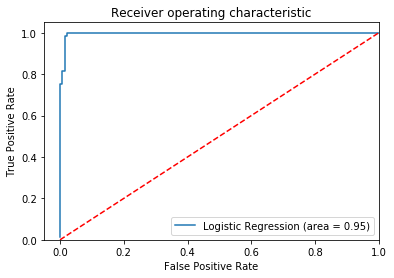

In [95]:
# Calculate the ROC curve for Logistic Regressioin Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [101]:
from sklearn import svm
model = svm.SVC()
model = model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)

In [102]:
# Examine results from Logistic Regression model
# Calculate confusion matrix on test data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_model)
print(confusion_matrix)

[[133   7]
 [  0  65]]


In [103]:
# Calculate Classification Report on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_model))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97       140
          1       0.90      1.00      0.95        65

avg / total       0.97      0.97      0.97       205



In [109]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes = bayes.fit(X_train, y_train)
y_pred_bayes = bayes.predict(X_test)

In [110]:
# Examine results from Logistic Regression model
# Calculate confusion matrix on test data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_bayes)
print(confusion_matrix)

[[133   7]
 [  0  65]]


In [111]:
# Calculate Classification Report on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bayes))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97       140
          1       0.90      1.00      0.95        65

avg / total       0.97      0.97      0.97       205



In [112]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=6)
KNN = KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)

In [113]:
# Calculate confusion matrix on test data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_KNN)
print(confusion_matrix)

[[138   2]
 [  5  60]]


In [114]:
# Calculate Classification Report on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KNN))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       140
          1       0.97      0.92      0.94        65

avg / total       0.97      0.97      0.97       205



# Conclusion: All models predict test data with well.  The Logistic Regression needed to have the hyperparameter tuned to achieve this. SVM and Naive Bayes performed the best.